<a href="https://colab.research.google.com/github/PrachiKumari04/Blog-Website/blob/main/AIML_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

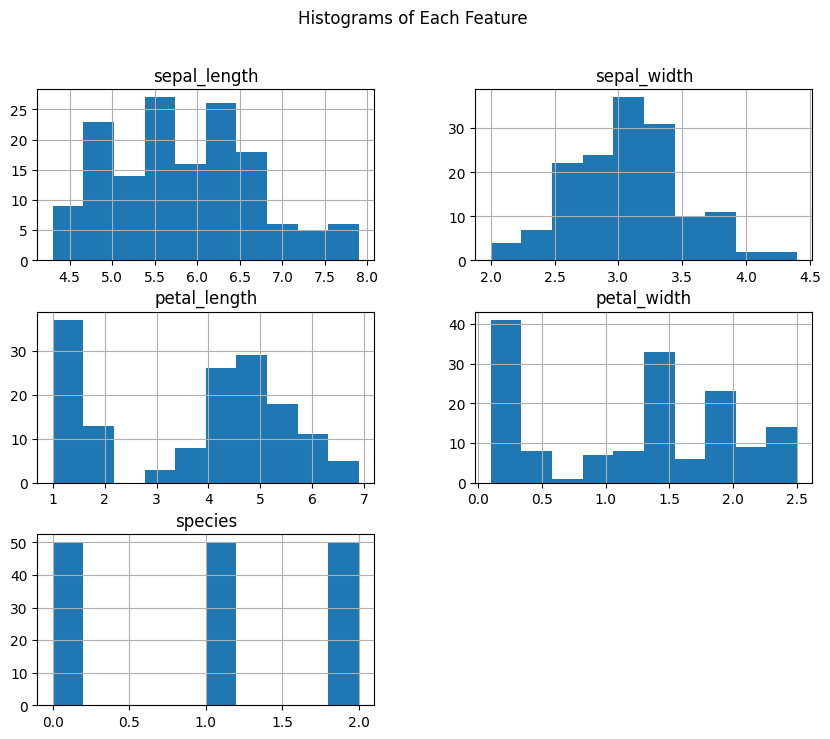

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Load Dataset
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Rename columns for clarity
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# 1. Histogram
df.hist(bins=10, figsize=(10, 8))
plt.suptitle("Histograms of Each Feature")
plt.show()



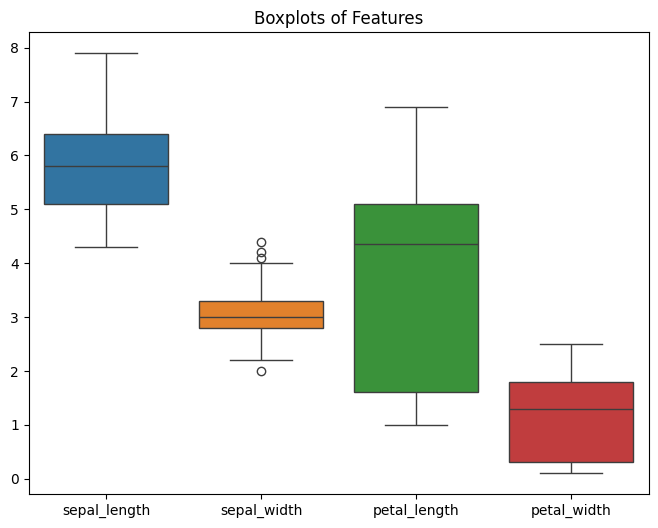

In [3]:
# 2. Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Boxplots of Features")
plt.show()


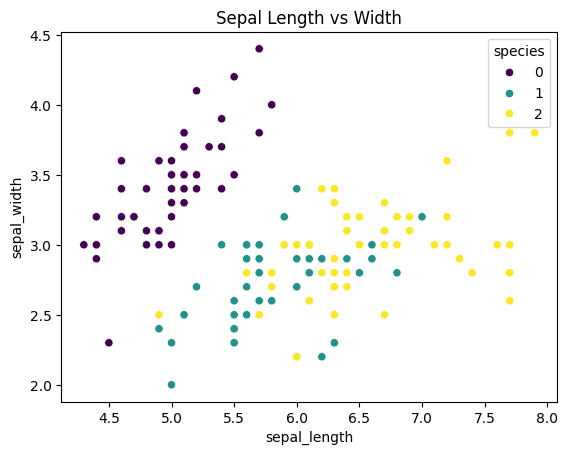

In [4]:
# 3. Scatter plot
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", palette="viridis")
plt.title("Sepal Length vs Width")
plt.show()


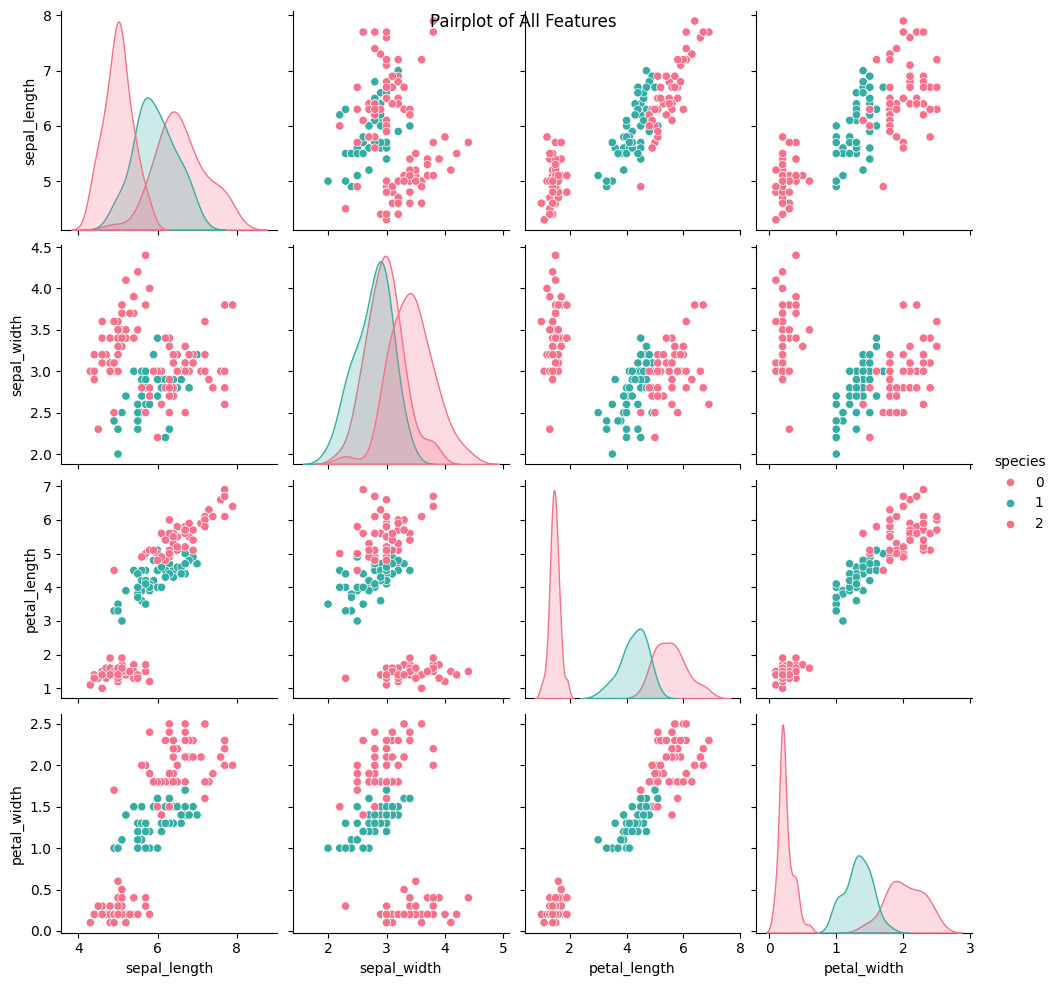

In [5]:
# 4. Pairplot
sns.pairplot(df, hue="species", palette="husl")
plt.suptitle("Pairplot of All Features")
plt.show()

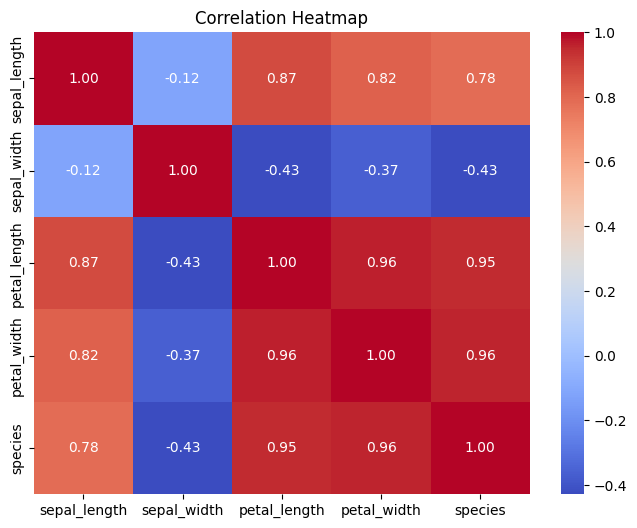

In [6]:
# 5. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

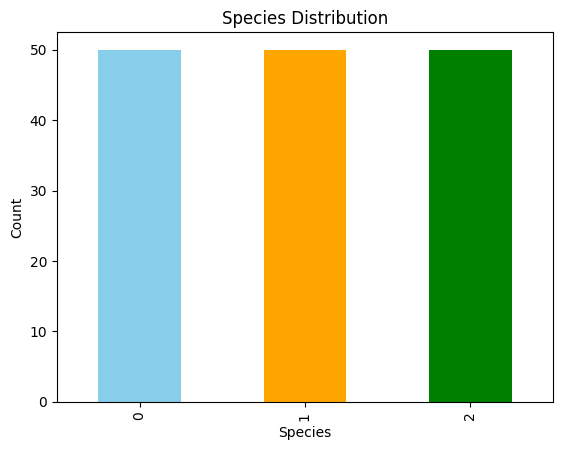

In [7]:
# 6. Bar plot (species distribution)
species_counts = df['species'].value_counts()
species_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

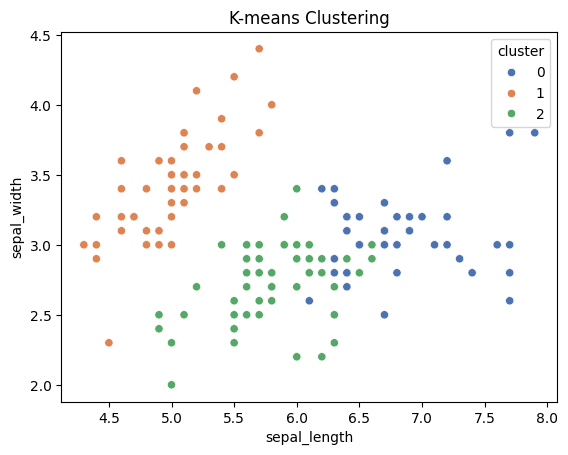

In [8]:
# 7. K-means Clustering Visualization
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df.iloc[:, :-2])
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="cluster", palette="deep")
plt.title("K-means Clustering")
plt.show()

<ipython-input-9-9d9c15987f35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="species", y="sepal_width", palette="muted")


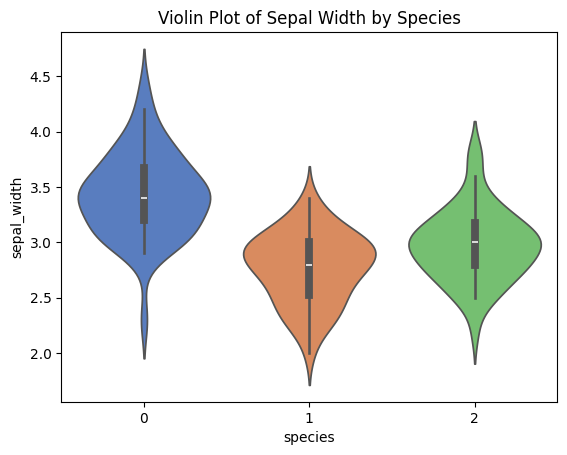

In [9]:
# 8. Violin Plot
sns.violinplot(data=df, x="species", y="sepal_width", palette="muted")
plt.title("Violin Plot of Sepal Width by Species")
plt.show()

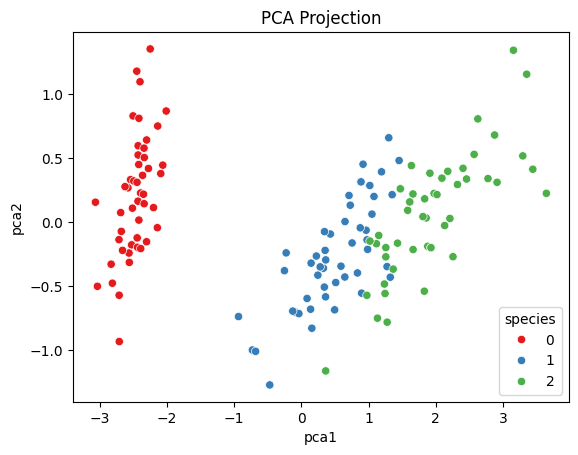

In [10]:
# 9. PCA (2D Visualization)
pca = PCA(n_components=2)
df['pca1'], df['pca2'] = zip(*pca.fit_transform(df.iloc[:, :-3]))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="species", palette="Set1")
plt.title("PCA Projection")
plt.show()

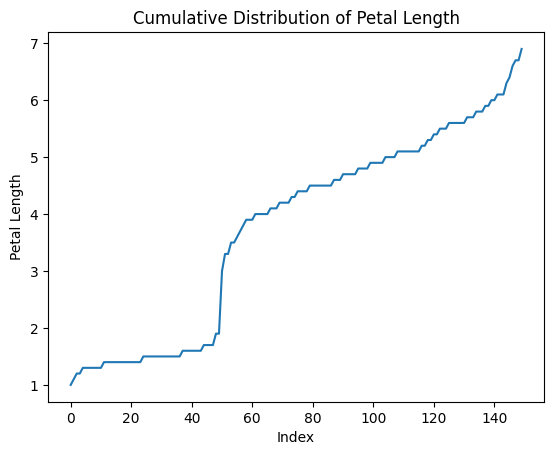

In [11]:
# 10. Line Plot
sorted_petal_length = np.sort(df['petal_length'])
plt.plot(sorted_petal_length)
plt.title("Cumulative Distribution of Petal Length")
plt.xlabel("Index")
plt.ylabel("Petal Length")
plt.show()

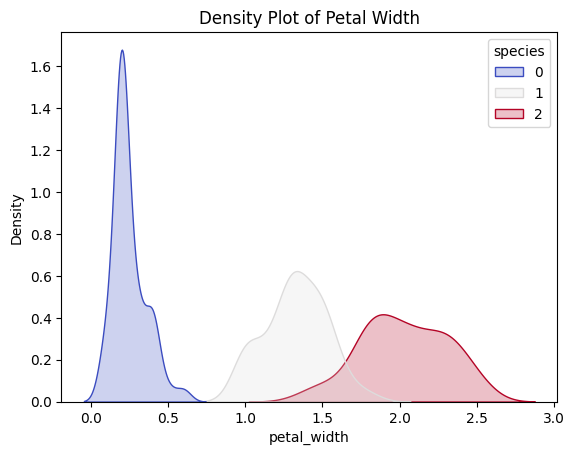

In [12]:
# 11. Density Plot
sns.kdeplot(data=df, x="petal_width", hue="species", fill=True, palette="coolwarm")
plt.title("Density Plot of Petal Width")
plt.show()

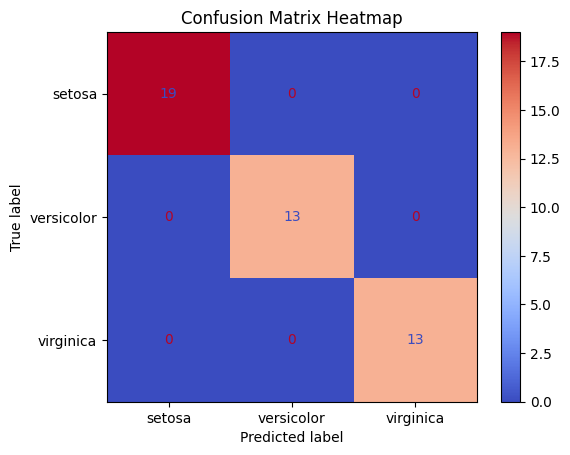

In [14]:
# 12. Confusion Matrix Heatmap
# Splitting into training/testing and model training for visualization purposes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-3], df['species'], test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="coolwarm")
plt.title("Confusion Matrix Heatmap")
plt.show()

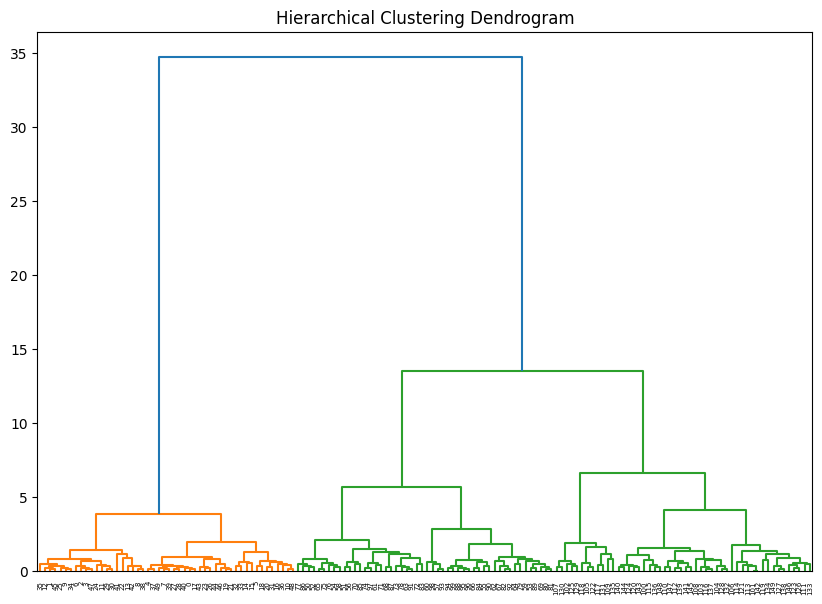

In [15]:
# 13. Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(df.iloc[:, :-3], method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

<ipython-input-16-8f6d80b00c39>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_counts = df.groupby(['species', 'sepal_length_category']).size().unstack()


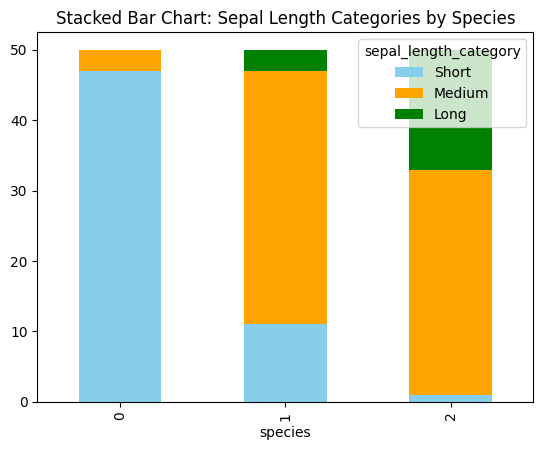

In [16]:
# 14. Stacked Bar Chart
categories = pd.cut(df['sepal_length'], bins=3, labels=["Short", "Medium", "Long"])
df['sepal_length_category'] = categories
stacked_counts = df.groupby(['species', 'sepal_length_category']).size().unstack()
stacked_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'green'])
plt.title("Stacked Bar Chart: Sepal Length Categories by Species")
plt.show()

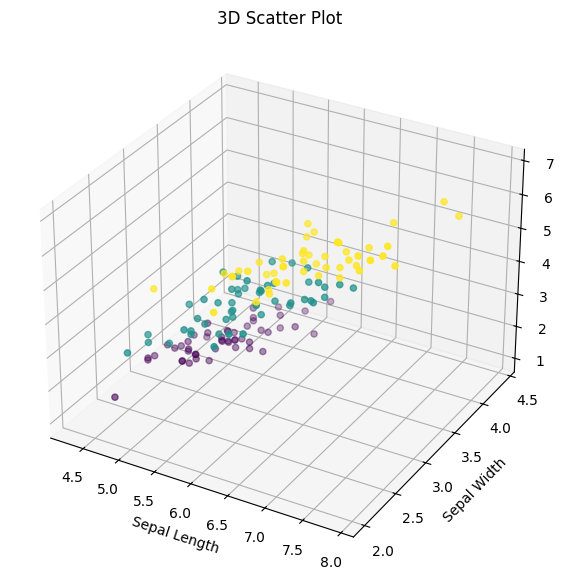

In [17]:
# 15. 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'], c=df['species'], cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title("3D Scatter Plot")
plt.show()